## Exploring the Weather in Athens
In this assignment we did explore the weather in Athens over a period of more than 50 years<br/>
Marina Samprovalaki p3180234 <br />
Department of Informatics <br />
Athens University of Economics and Business <br />
p3180234@aueb.gr <br />

### Q1: Obtain the Data 
We worked with data covering the period from 1955 to 2020. We used data from 2 sources, the first was the National Oceanic and Atmospheric Administration's National Centers for Environmental Information and the second was the Hellenic Data Service.

Firstly, we have to import the libraries we are gonna use. Numpy offers comprehensive mathematical functions, random number generators, linear algebra routines and more. In addition, Pandas used for data manipulation and analysis and is a very powerful tool in our hands. Last but not least, the Seaborn library is used for data visualization and plotting,just like Matplotlib

In [443]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib


### Loading Data from CSV
Our data is saved in csv files, so we are gonna use the read_csv command which is offered by the Pandas Library. The head() command returns the first rows of our dataset. <br/>

In [444]:
data = pd.read_csv("oceans.csv")
data.head()

,STATION,DATE,PRCP,TAVG
0,GR000016716,1955-01-01,0.0,NaN
1,GR000016716,1955-01-02,2.0,NaN
2,GR000016716,1955-01-03,0.0,NaN
3,GR000016716,1955-01-04,0.0,NaN
4,GR000016716,1955-01-05,0.0,NaN


In [445]:
data.shape

(23251, 4)

Our dataset has 4 columns, STATION,DATE,PRCP and TAVG. <br/>
We drop column STATION because it includes the same record in each row and offers nothing in statistical analysis. 

In [446]:
data.drop('STATION',1)

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
23246,2020-12-27,0.0,16.6
23247,2020-12-28,6.6,14.8
23248,2020-12-29,0.0,16.3
23249,2020-12-30,0.0,16.4


As we can see, the TAVG column has many NaN values,that means we have missing values in the dataset. <br/>
So at first, we are gonna search for NaN values in the others columns,starting from PRCP column. <br/>
From the results in the following cells, we ended up with NaN values only in PRCP and TAVG columns. The former has 478 NaN values and the latter 2311.

In [447]:
data['DATE'].isnull().values.any()

False

In [448]:
data['PRCP'].isnull().values.any()

True

In [449]:
data['PRCP'].isnull().values.sum()

478

In [450]:
data['TAVG'].isnull().values.any()

True

In [451]:
data['TAVG'].isnull().values.sum()

2311

Having NaN values in our dataset might be a problem, so I am gonna use the alternative dataset from the Hellenic Data Service. I use the command read_csv that Pandas offer because the dataset is saved in a csv file. <br/>
hellenicon.csv file has no headers, so I added them from the documentation on my own.

In [452]:
hellenicon_data = pd.read_csv("_hellenicon.csv",
                          names = ['DATE','TAVG','MaxTemp','MinTemp','MaxHum','MinHum','MeanHum','MinPress','MaxPress','MeanPress','PRCP','WindSpeed','WindDir','WindGust'
                          ])
hellenicon_data.head()

,DATE,TAVG,MaxTemp,MinTemp,MaxHum,MinHum,MeanHum,MinPress,MaxPress,MeanPress,PRCP,WindSpeed,WindDir,WindGust
0,1/1/2010,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,1/2/2010,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,1/3/2010,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,1/4/2010,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,1/5/2010,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8


Filling NaN values in the dataset requires merging the 2 datasets in 1 which called newdataset. <br/>
Pandas offers merging and we are gonna use outer join because there are some values in hellenicon.csv which have --- and not arithmetic values. So we deleted them and filled the missing data of our dataset. <br/>
At the beginning we had used left join, but there was some issues on plot in Q5 so we decided to use the outer join.

In [453]:
newdataset = pd.merge(data,
                   hellenicon_data[['DATE','PRCP']],
                   on = 'DATE',
                   how = 'outer'
                     )
newdataset

,STATION,DATE,PRCP_x,TAVG,PRCP_y
0,GR000016716,1955-01-01,0.0,NaN,NaN
1,GR000016716,1955-01-02,2.0,NaN,NaN
2,GR000016716,1955-01-03,0.0,NaN,NaN
3,GR000016716,1955-01-04,0.0,NaN,NaN
4,GR000016716,1955-01-05,0.0,NaN,NaN
...,...,...,...,...,...
26898,NaN,12/27/2019,NaN,NaN,0.0
26899,NaN,12/28/2019,NaN,NaN,7.2
26900,NaN,12/29/2019,NaN,NaN,3.4
26901,NaN,12/30/2019,NaN,NaN,12.4


In [454]:
print(newdataset.shape)

(26903, 5)


Merging created 2 different columns,called PRCP_x and PRCP_y, so now we have 5 columns. <br />

Dropping the STATION column as I did before for the same reason.

In [455]:
newdataset.drop('STATION',1)

,DATE,PRCP_x,TAVG,PRCP_y
0,1955-01-01,0.0,NaN,NaN
1,1955-01-02,2.0,NaN,NaN
2,1955-01-03,0.0,NaN,NaN
3,1955-01-04,0.0,NaN,NaN
4,1955-01-05,0.0,NaN,NaN
...,...,...,...,...
26898,12/27/2019,NaN,NaN,0.0
26899,12/28/2019,NaN,NaN,7.2
26900,12/29/2019,NaN,NaN,3.4
26901,12/30/2019,NaN,NaN,12.4


In [456]:
newdataset['PRCP_x'].isnull().values.sum()

4130

The rest 478 NaN values are gonna be filled with the PRCP_y values

In [457]:
newdataset['PRCP_x'].fillna(newdataset['PRCP_y'],inplace=True)

In [458]:
newdataset['PRCP_x'].isnull().values.sum()

478

In [459]:
newdataset

,STATION,DATE,PRCP_x,TAVG,PRCP_y
0,GR000016716,1955-01-01,0.0,NaN,NaN
1,GR000016716,1955-01-02,2.0,NaN,NaN
2,GR000016716,1955-01-03,0.0,NaN,NaN
3,GR000016716,1955-01-04,0.0,NaN,NaN
4,GR000016716,1955-01-05,0.0,NaN,NaN
...,...,...,...,...,...
26898,NaN,12/27/2019,0.0,NaN,0.0
26899,NaN,12/28/2019,7.2,NaN,7.2
26900,NaN,12/29/2019,3.4,NaN,3.4
26901,NaN,12/30/2019,12.4,NaN,12.4


In [460]:
newdataset.shape

(26903, 5)

In [461]:
newdataset.drop('STATION',1)

,DATE,PRCP_x,TAVG,PRCP_y
0,1955-01-01,0.0,NaN,NaN
1,1955-01-02,2.0,NaN,NaN
2,1955-01-03,0.0,NaN,NaN
3,1955-01-04,0.0,NaN,NaN
4,1955-01-05,0.0,NaN,NaN
...,...,...,...,...
26898,12/27/2019,0.0,NaN,0.0
26899,12/28/2019,7.2,NaN,7.2
26900,12/29/2019,3.4,NaN,3.4
26901,12/30/2019,12.4,NaN,12.4


Now that we filled the NaN values of PRCP_x column, we can rename that column and use it in our dataset.

In [462]:
newdataset= newdataset.rename(columns={'PRCP_x':'PRCP'})

In [463]:
newdataset.head()

,STATION,DATE,PRCP,TAVG,PRCP_y
0,GR000016716,1955-01-01,0.0,NaN,NaN
1,GR000016716,1955-01-02,2.0,NaN,NaN
2,GR000016716,1955-01-03,0.0,NaN,NaN
3,GR000016716,1955-01-04,0.0,NaN,NaN
4,GR000016716,1955-01-05,0.0,NaN,NaN


We dropped the STATION column once again and also the PRCP_y column because we don't need it anymore.

In [464]:
newdataset=newdataset.drop('STATION',1)
newdataset= newdataset.drop('PRCP_y',1)
newdataset.head()

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN


In [465]:
newdataset['TAVG'].isnull().values.any()

True

In [466]:
newdataset['TAVG'].isnull().values.sum()

5963

Merging didn't create different cells for the TAVG column, so we have to find an alternative way to fill the NaN values in TAVG column. The first solution came to our mind was filling the values with 0, but we know that this might be create some issues in our dataset mainly in multiplications. We did search online and found out that filling the NaN values with the mean value is a very satisfying method.

In [467]:
newdataset['TAVG'].fillna(newdataset['TAVG'].mean(),inplace=True) 

In [468]:
newdataset['TAVG'].isnull().values.sum()

0

It worked! TAVG column is now out of NaN values.

In [469]:
newdataset.head()

,DATE,PRCP,TAVG
0,1955-01-01,0.0,18.273873
1,1955-01-02,2.0,18.273873
2,1955-01-03,0.0,18.273873
3,1955-01-04,0.0,18.273873
4,1955-01-05,0.0,18.273873


### Q2: Deviation of Summer Temperatures
In this task, we have to create a graph showing the mean summer temperature deviation from a baseline of 1974-1999.


The first step  for our goal is to isolate the summer months from our dataset. It's important to be mentioned that DATE column in our dataset is in a string format, so we have to convert the values in datetime format using pandas. Then,we create a dictionary with the four seasons and use mathematical functions to seperate the months per season. <br/>
This solution was found at https://stackoverflow.com/questions/60285557/extract-seasons-from-datetime-pandas

In [470]:
newdataset['DATE'] = pd.to_datetime(newdataset['DATE'])

In [471]:
month_per_season = (newdataset['DATE'].dt.month%12+3)//3
seasons = {
    
    1:'Winter',
    2:'Spring',
    3:'Summer',
    4:'Autumn'

}
newdataset['season'] = month_per_season.map(seasons)
newdataset[newdataset['season'] == 'Summer']

,DATE,PRCP,TAVG,season
151,1955-06-01,0.0,18.273873,Summer
152,1955-06-02,0.0,18.273873,Summer
153,1955-06-03,0.0,18.273873,Summer
154,1955-06-04,0.0,18.273873,Summer
155,1955-06-05,0.0,18.273873,Summer
...,...,...,...,...
26776,2019-08-27,0.0,18.273873,Summer
26777,2019-08-28,0.0,18.273873,Summer
26778,2019-08-29,0.0,18.273873,Summer
26779,2019-08-30,0.0,18.273873,Summer


Now that our dataset includes information about the summer months from 1955 to 2020, we can isolate the data covering the period from 1974-1999.

In [472]:
temp_in_summer = newdataset[(newdataset['season'] == 'Summer') 
                            & (newdataset['DATE'].dt.year >= 1974) 
                            & (newdataset['DATE'].dt.year <= 1999)]
temp_in_summer.drop_duplicates(keep='first',inplace=True)
temp_in_summer = temp_in_summer.drop('season',1)
temp_in_summer

<ipython-input-472-b67463d0e35e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_in_summer.drop_duplicates(keep='first',inplace=True)


,DATE,PRCP,TAVG
7091,1974-06-01,0.0,22.7
7092,1974-06-02,0.0,23.2
7093,1974-06-03,0.2,22.2
7094,1974-06-04,2.5,21.0
7095,1974-06-05,0.0,24.0
...,...,...,...
16309,1999-08-27,0.0,24.7
16310,1999-08-28,0.0,24.7
16311,1999-08-29,0.0,25.3
16312,1999-08-30,0.0,25.9


In Q1 we filled the NaN values on TAVG column with the mean value of TAVG, so TAVG has not NaN values anymore

In [473]:
newdataset['TAVG'].isnull().values.any()

False

In the next step, we are trying to find the mean deviation of TAVG through summer.<br/>
Mean deviation is used to compute how far the values in a data set are from the center point. We can find this value if we subtract the mean value of TAVG from TAVG value in each row.

In [474]:
temp_in_summer.loc[:,"Mean_Deviation"] = temp_in_summer.loc[:,'TAVG'] - temp_in_summer.loc[:,'TAVG'].mean()

In [475]:
temp_in_summer.head()

,DATE,PRCP,TAVG,Mean_Deviation
7091,1974-06-01,0.0,22.7,-3.512184
7092,1974-06-02,0.0,23.2,-3.012184
7093,1974-06-03,0.2,22.2,-4.012184
7094,1974-06-04,2.5,21.0,-5.212184
7095,1974-06-05,0.0,24.0,-2.212184


Now that we have the Mean Deviation of TAVG, we want to isolate the year of each TAVG from the DATE column. We have converted this column in datetime,so we can enjoy the benefits Pandas offers for datetime data. That means we can access in the year of each row using the command .dt.year <br/>
Also it's important to mention that we can access in a group of rows using the .loc[] commmand from Pandas.

In [476]:
temp_in_summer.loc[:,'YEAR'] = temp_in_summer.loc[:,'DATE'].dt.year

In [477]:
temp_in_summer

,DATE,PRCP,TAVG,Mean_Deviation,YEAR
7091,1974-06-01,0.0,22.7,-3.512184,1974
7092,1974-06-02,0.0,23.2,-3.012184,1974
7093,1974-06-03,0.2,22.2,-4.012184,1974
7094,1974-06-04,2.5,21.0,-5.212184,1974
7095,1974-06-05,0.0,24.0,-2.212184,1974
...,...,...,...,...,...
16309,1999-08-27,0.0,24.7,-1.512184,1999
16310,1999-08-28,0.0,24.7,-1.512184,1999
16311,1999-08-29,0.0,25.3,-0.912184,1999
16312,1999-08-30,0.0,25.9,-0.312184,1999


We can group our dataset by the year with the groupby command.<br/>
The transform(sum) command returns a self-produced dataframe with transformed values after applying the sum function. To make the long story short,groupby splits the data while tranform uses the sum function to sum all TAVG values for each year.<br/>
A good examplanation of the transform command is at https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/.

In [478]:
temp_in_summer.loc[:,'Yearly_Average'] = temp_in_summer.groupby(['YEAR'])['TAVG'].transform(sum)

In [479]:
temp_in_summer

,DATE,PRCP,TAVG,Mean_Deviation,YEAR,Yearly_Average
7091,1974-06-01,0.0,22.7,-3.512184,1974,2389.743238
7092,1974-06-02,0.0,23.2,-3.012184,1974,2389.743238
7093,1974-06-03,0.2,22.2,-4.012184,1974,2389.743238
7094,1974-06-04,2.5,21.0,-5.212184,1974,2389.743238
7095,1974-06-05,0.0,24.0,-2.212184,1974,2389.743238
...,...,...,...,...,...,...
16309,1999-08-27,0.0,24.7,-1.512184,1999,2573.600000
16310,1999-08-28,0.0,24.7,-1.512184,1999,2573.600000
16311,1999-08-29,0.0,25.3,-0.912184,1999,2573.600000
16312,1999-08-30,0.0,25.9,-0.312184,1999,2573.600000


We want the total number of records for each year, so we have to use the agg.('count') command. The agg('count') command counts the rows of a column.

In [480]:
num_of_records = temp_in_summer.groupby(temp_in_summer['DATE'].dt.year).agg('count')
num_of_records

,DATE,PRCP,TAVG,Mean_Deviation,YEAR,Yearly_Average
DATE,,,,,,
1974,92,92,92,92,92,92
1975,92,92,92,92,92,92
1976,92,92,92,92,92,92
1977,92,92,92,92,92,92
1978,92,92,92,92,92,92
1979,92,92,92,92,92,92
1980,92,92,92,92,92,92
1981,92,92,92,92,92,92
1982,92,92,92,92,92,92


With the previous command, we figured out that each year in our dataset has 92 records because summer lasts 92 days. June has 30 days while July and August have 31. So finding the yearly average for each year, requires dividing the previous Yearly Average with 92.

In [481]:
temp_in_summer.loc[:,'Yearly_Average'] /= 92
temp_in_summer

,DATE,PRCP,TAVG,Mean_Deviation,YEAR,Yearly_Average
7091,1974-06-01,0.0,22.7,-3.512184,1974,25.975470
7092,1974-06-02,0.0,23.2,-3.012184,1974,25.975470
7093,1974-06-03,0.2,22.2,-4.012184,1974,25.975470
7094,1974-06-04,2.5,21.0,-5.212184,1974,25.975470
7095,1974-06-05,0.0,24.0,-2.212184,1974,25.975470
...,...,...,...,...,...,...
16309,1999-08-27,0.0,24.7,-1.512184,1999,27.973913
16310,1999-08-28,0.0,24.7,-1.512184,1999,27.973913
16311,1999-08-29,0.0,25.3,-0.912184,1999,27.973913
16312,1999-08-30,0.0,25.9,-0.312184,1999,27.973913


Similar to the previous cells,we wanna find the Mean Deviation of TAVG for each year,so we have to subtract the mean value of TAVG from the Yearly_Average we have already calculated. To do so, we have to copy the data from the previous board to a new one called summer_per_year.<br/>

In [482]:
summer_per_year = temp_in_summer[['YEAR','Yearly_Average']].copy()
summer_per_year.drop_duplicates(keep='first',inplace=True)

In [483]:
summer_per_year

,YEAR,Yearly_Average
7091,1974,25.975470
7456,1975,25.935870
7822,1976,24.820652
8187,1977,26.558696
8552,1978,25.790217
8917,1979,26.150000
9283,1980,25.596739
9648,1981,25.557609
10013,1982,25.027174
10378,1983,24.348913


In [484]:
summer_per_year.loc[:,'Mean_Deviation'] = summer_per_year.loc[:,'Yearly_Average'] - temp_in_summer.loc[:,'TAVG'].mean()

In [485]:
summer_per_year = summer_per_year.drop('Yearly_Average',1)
summer_per_year

,YEAR,Mean_Deviation
7091,1974,-0.236714
7456,1975,-0.276314
7822,1976,-1.391531
8187,1977,0.346512
8552,1978,-0.421966
8917,1979,-0.062184
9283,1980,-0.615444
9648,1981,-0.654575
10013,1982,-1.185010
10378,1983,-1.863271


Now it's time for the Rolling.<br/>
According to Google, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. <br/>
We want to find the 10 years rolling average of the deviation from the mean,so we have to use Pandas -rolling() command.<br/>
The second argument of the rolling function guarantees that the minimum number of observations in window required to have a value is 1. To sum up, with this command, the rolling line would start from the beginning of the axes.

In [486]:
summer_per_year ['Rolling_Average'] = summer_per_year.Mean_Deviation.rolling(10,min_periods=1).mean()
summer_per_year

,YEAR,Mean_Deviation,Rolling_Average
7091,1974,-0.236714,-0.236714
7456,1975,-0.276314,-0.256514
7822,1976,-1.391531,-0.634853
8187,1977,0.346512,-0.389512
8552,1978,-0.421966,-0.396003
8917,1979,-0.062184,-0.340366
9283,1980,-0.615444,-0.379663
9648,1981,-0.654575,-0.414027
10013,1982,-1.185010,-0.499692
10378,1983,-1.863271,-0.636050


## Plotting time
We are gonna create a barplot using the MatPlotLib. <br/>
In the x-axes we are gonna put the years and in the y-axis the mean temperature deviation.<br/>
The long-term linear trend is made by Seaborn Library and the 10-years SMA with the command plot from MatPlotLib.

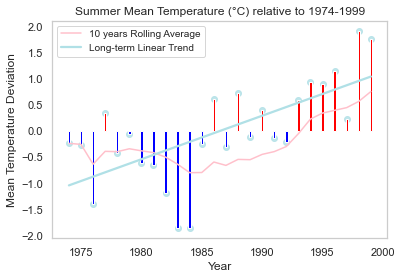

In [487]:
plt.bar(summer_per_year.YEAR,summer_per_year.Mean_Deviation,width=0.2,color=(summer_per_year.Mean_Deviation>0).map(
                                                        {True:'red',False:'blue'}))
plt.plot(summer_per_year.YEAR,summer_per_year.Rolling_Average,color='pink')
plt.grid()
sns.regplot(x=summer_per_year.YEAR,y=summer_per_year.Mean_Deviation,data=data, fit_reg=True,color = 'powderblue',ci=None)

plt.xlabel('Year')
plt.ylabel("Mean Temperature Deviation")
plt.title("Summer Mean Temperature (°C) relative to 1974-1999")

plt.legend(labels =['10 years Rolling Average','Long-term Linear Trend'], fontsize=10)
plt.show()

### Intepretation of the figure

The plot makes clear that as the years go by the temperature of our planet increases. That phenomenon is also known as Global Warming. It's important to mention that the Mean Temperature Deviation in 80's was significantly lower than 90's and that is a fact many researchers have already proved. According to a research, Planet Earth experienced a global climate shift in the late 1980s on an unprecedented scale, fueled by anthropogenic warming and a volcanic eruption. In addition it is known that the summer of 1988 was the hottest on record and it was the trigger for scientists to realize that Global Warming exists. <br/>
As for anomaly in 1977, we did a Google search and we figured out that there was a mini ice age but unfortunately the scientific community never took the issue to heart. As a result, the mean temperature deviation increased but not in a significant level. <br/>
As for the Rolling Average, depicts the average Mean Temperature Deviation and how it has been changed through years. In 1970-1980, this value is smaller but after 1980, the average value is getting higher,so thaat means that the temperature has been higher.<br/>
The statistical trend line shows how much the temperature has been increased since 1975. <br/>

Source: https://www.sciencedaily.com/releases/2015/11/151124081517.htm 

## Q3: Evolution of Daily Temperatures
In this task we have to create a plot showing the daily temperature for each year using 30 days rolling average. <br>
As we have already said, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.

At first, we are gonna create a dataset from our original dataset called df_per_year.

In [488]:
df_per_year = newdataset[['DATE','TAVG']].copy()
df_per_year.drop_duplicates(keep='first',inplace=True)

## Smoothing the line by using a 30 years rolling average.

In [489]:
df_per_year['Rolling_Years'] = df_per_year['TAVG'].rolling(30,min_periods=1).mean()

In [490]:
df_per_year

,DATE,TAVG,Rolling_Years
0,1955-01-01,18.273873,18.273873
1,1955-01-02,18.273873,18.273873
2,1955-01-03,18.273873,18.273873
3,1955-01-04,18.273873,18.273873
4,1955-01-05,18.273873,18.273873
...,...,...,...
26898,2019-12-27,18.273873,18.273873
26899,2019-12-28,18.273873,18.273873
26900,2019-12-29,18.273873,18.273873
26901,2019-12-30,18.273873,18.273873


Creating a dataset for the black line which showing the average daily temperature for the baseline period of 1974-1999. 

In [491]:
df_per_day = newdataset[(newdataset['DATE'].dt.year >= 1974) 
                            & (newdataset['DATE'].dt.year <= 1999)]
df_per_day = df_per_day.drop ('season',1)

In [492]:
df_per_day.tail()

,DATE,PRCP,TAVG
16431,1999-12-27,0.0,15.4
16432,1999-12-28,0.0,16.9
16433,1999-12-29,0.0,15.1
16434,1999-12-30,0.0,13.4
16435,1999-12-31,9.9,14.9


## Smoothing the line using a 30 days rolling average.<br/>

At first we create the Day and Month columns in our dataset and we grouping by them the TAVG since 1974 to 1999. We saved this dataset to '74-99'

In [493]:
df_per_day.loc[:,'Day'] = df_per_year.loc[:,('DATE')].dt.day

In [494]:
df_per_day.loc[:,'Month'] = df_per_year.loc[:,('DATE')].dt.month

In [495]:
df_per_day.loc[:,'74-99'] = df_per_day.groupby(['Day','Month'])['TAVG'].transform(sum)

In [496]:
df_per_day

,DATE,PRCP,TAVG,Day,Month,74-99
6940,1974-01-01,0.0,11.6,1,1,269.5
6941,1974-01-02,0.0,13.7,2,1,278.4
6942,1974-01-03,10.0,12.2,3,1,265.4
6943,1974-01-04,0.0,10.8,4,1,250.5
6944,1974-01-05,0.1,9.6,5,1,257.9
...,...,...,...,...,...,...
16431,1999-12-27,0.0,15.4,27,12,254.0
16432,1999-12-28,0.0,16.9,28,12,265.4
16433,1999-12-29,0.0,15.1,29,12,280.2
16434,1999-12-30,0.0,13.4,30,12,295.2


25 years has gone from 1974 to 1999, so we have to divide the TAVG per year from our '74-99' dataset with 25 

In [497]:
df_per_day['74-99'] = df_per_day['74-99'].div(25)

In [498]:
df_per_day = df_per_day.drop('PRCP',1)

In [499]:
df_per_day

,DATE,TAVG,Day,Month,74-99
6940,1974-01-01,11.6,1,1,10.780
6941,1974-01-02,13.7,2,1,11.136
6942,1974-01-03,12.2,3,1,10.616
6943,1974-01-04,10.8,4,1,10.020
6944,1974-01-05,9.6,5,1,10.316
...,...,...,...,...,...
16431,1999-12-27,15.4,27,12,10.160
16432,1999-12-28,16.9,28,12,10.616
16433,1999-12-29,15.1,29,12,11.208
16434,1999-12-30,13.4,30,12,11.808


Finding the Average Daily Temperature requires the rolling average for 30 days, so we use the rolling function from Pandas.

In [500]:
df_per_day ["Average_Daily_Temperature"] = df_per_day['TAVG'].rolling(30,min_periods=1).mean()

In [501]:
df_per_day.head()

,DATE,TAVG,Day,Month,74-99,Average_Daily_Temperature
6940,1974-01-01,11.6,1,1,10.780,11.600
6941,1974-01-02,13.7,2,1,11.136,12.650
6942,1974-01-03,12.2,3,1,10.616,12.500
6943,1974-01-04,10.8,4,1,10.020,12.075
6944,1974-01-05,9.6,5,1,10.316,11.580


We created a dictionary called months to get the month name from a month number.

In [502]:
months = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

## Plotting time
We will use the Seaborn Library to draw a line plot with possibility of several semantic groupings. <br/>


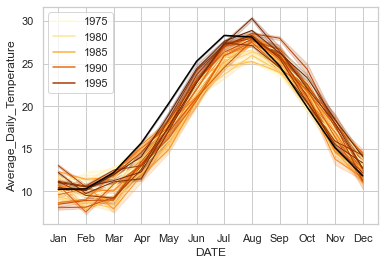

In [503]:
sns.set(style="whitegrid")

sns.lineplot(
        x = df_per_day['DATE'].dt.month.map(months),
        y = 'Average_Daily_Temperature',
        hue = df_per_day['DATE'].dt.year,
        data = df_per_day,
        linewidth=1,
        #legend=None,
        palette = sns.color_palette("YlOrBr", as_cmap=True)
        )
sns.lineplot (
    x=df_per_day['DATE'].dt.month.map(months),
    y='74-99', 
    data=df_per_day,
    color = 'black'
        )


plt.show()

### Intepretation of the figure

As we can see the Average Daily Temperature, as years go by, is getting higher. Red line which indicates 1995 is higher than the other lines and that means our world has been warmer. As for the black line,the 30 days Rolling Average, it depicts the average Daily Temperature and how it has been changed through years. As we can observe, summer months are warmer than the other months but the Average Daily Value after 1985 is significantly higher than the previous years. As we know, the summer of 1985 is known as the start of Global Warming. So the fact that daily temperature after 1985 has been higher is quite reasonable and it is shown in our plot. <br/>
In addition, we can see that months which belong in autumn and winter from 1985 to 1999, the Average Daily Temperature is lower but it's still higher than in the Average Daily Temperature in the previous years. That means that Global Warming has nothing to do with the seasons of the year.

## Q4: Extreme Temperature Events
In this task we are interested in extreme events. Extreme events are defined as those beyond 5% or 10% from the expected value and we will deal with extreme heat events going 10% above the baseline. <br/>
Unfortunately this task didn't end well, because we had some issues so we didn't complete it.

In [504]:
df_1976 = newdataset[(newdataset['DATE'].dt.year >= 1976)]
df_1976 = df_1976.drop('season',1)
df_1976

,DATE,PRCP,TAVG
7670,1976-01-01,0.0,11.300000
7671,1976-01-02,0.0,12.400000
7672,1976-01-03,0.0,13.600000
7673,1976-01-04,0.0,13.600000
7674,1976-01-05,0.0,8.400000
...,...,...,...
26898,2019-12-27,0.0,18.273873
26899,2019-12-28,7.2,18.273873
26900,2019-12-29,3.4,18.273873
26901,2019-12-30,12.4,18.273873


In [505]:
extreme = df_per_day.copy()
extreme.drop_duplicates(keep='first',inplace=True)
extreme

,DATE,TAVG,Day,Month,74-99,Average_Daily_Temperature
6940,1974-01-01,11.6,1,1,10.780,11.600000
6941,1974-01-02,13.7,2,1,11.136,12.650000
6942,1974-01-03,12.2,3,1,10.616,12.500000
6943,1974-01-04,10.8,4,1,10.020,12.075000
6944,1974-01-05,9.6,5,1,10.316,11.580000
...,...,...,...,...,...,...
16431,1999-12-27,15.4,27,12,10.160,13.303333
16432,1999-12-28,16.9,28,12,10.616,13.540000
16433,1999-12-29,15.1,29,12,11.208,13.680000
16434,1999-12-30,13.4,30,12,11.808,13.753333


In [506]:
extreme_temp = df_1976.copy() #'74-99' has daily average
#extreme_temp = extreme_temp.drop("season",1)
extreme_temp ['Extreme'] = extreme ['74-99'] * 0.1 + extreme['74-99']

In [507]:
extreme_temp

,DATE,PRCP,TAVG,Extreme
7670,1976-01-01,0.0,11.300000,11.8580
7671,1976-01-02,0.0,12.400000,12.2496
7672,1976-01-03,0.0,13.600000,11.6776
7673,1976-01-04,0.0,13.600000,11.0220
7674,1976-01-05,0.0,8.400000,11.3476
...,...,...,...,...
26898,2019-12-27,0.0,18.273873,NaN
26899,2019-12-28,7.2,18.273873,NaN
26900,2019-12-29,3.4,18.273873,NaN
26901,2019-12-30,12.4,18.273873,NaN


In [508]:
temp_per_day = newdataset[['DATE','TAVG']].copy()
extreme.drop_duplicates(keep='first',inplace=True)

In [509]:
temp_per_day

,DATE,TAVG
0,1955-01-01,18.273873
1,1955-01-02,18.273873
2,1955-01-03,18.273873
3,1955-01-04,18.273873
4,1955-01-05,18.273873
...,...,...
26898,2019-12-27,18.273873
26899,2019-12-28,18.273873
26900,2019-12-29,18.273873
26901,2019-12-30,18.273873


In [510]:
temp_per_day = temp_per_day.loc [(temp_per_day ['DATE'].dt.year >= 1974) 
                            & (temp_per_day['DATE'].dt.year <= 1999)]

In [511]:
temp_per_day

,DATE,TAVG
6940,1974-01-01,11.6
6941,1974-01-02,13.7
6942,1974-01-03,12.2
6943,1974-01-04,10.8
6944,1974-01-05,9.6
...,...,...
16431,1999-12-27,15.4
16432,1999-12-28,16.9
16433,1999-12-29,15.1
16434,1999-12-30,13.4


We want to find if a specific temperature is considered as extreme, so we have to chech if it's TAVG value is 10% higher or not.

In [512]:
temp_per_day['Extreme_Temperature'] = temp_per_day ['TAVG'] - extreme_temp ['Extreme'] 

<ipython-input-512-6ae58a5d6729>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_per_day['Extreme_Temperature'] = temp_per_day ['TAVG'] - extreme_temp ['Extreme']


In [513]:
temp_per_day.loc[temp_per_day['Extreme_Temperature'] > 0, 'Extreme'] = 'True' 
temp_per_day.loc[temp_per_day['Extreme_Temperature'] <= 0, 'Extreme'] = 'False'

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [514]:
temp_per_day

,DATE,TAVG,Extreme_Temperature,Extreme
6940,1974-01-01,11.6,NaN,NaN
6941,1974-01-02,13.7,NaN,NaN
6942,1974-01-03,12.2,NaN,NaN
6943,1974-01-04,10.8,NaN,NaN
6944,1974-01-05,9.6,NaN,NaN
...,...,...,...,...
16431,1999-12-27,15.4,4.2240,True
16432,1999-12-28,16.9,5.2224,True
16433,1999-12-29,15.1,2.7712,True
16434,1999-12-30,13.4,0.4112,True


In [515]:
temp_per_day ['Extreme'].value_counts()

False    7264
True     1502
Name: Extreme, dtype: int64

So we have 1502 extreme events in our dataset.

In [516]:
temp_per_day ['Extreme_per_Year'] = temp_per_day.groupby(temp_per_day['DATE'].dt.year)['Extreme_Temperature'].transform(sum)

<ipython-input-516-74106b836c88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_per_day ['Extreme_per_Year'] = temp_per_day.groupby(temp_per_day['DATE'].dt.year)['Extreme_Temperature'].transform(sum)


In [517]:
temp_per_day

,DATE,TAVG,Extreme_Temperature,Extreme,Extreme_per_Year
6940,1974-01-01,11.6,NaN,NaN,0.000000
6941,1974-01-02,13.7,NaN,NaN,0.000000
6942,1974-01-03,12.2,NaN,NaN,0.000000
6943,1974-01-04,10.8,NaN,NaN,0.000000
6944,1974-01-05,9.6,NaN,NaN,0.000000
...,...,...,...,...,...
16431,1999-12-27,15.4,4.2240,True,-416.167381
16432,1999-12-28,16.9,5.2224,True,-416.167381
16433,1999-12-29,15.1,2.7712,True,-416.167381
16434,1999-12-30,13.4,0.4112,True,-416.167381


In [518]:
temp_per_day['percent_per_year'] = np.where(temp_per_day['DATE'].dt.is_leap_year, temp_per_day['Extreme_per_Year']/366, temp_per_day['Extreme_per_Year']/365)

<ipython-input-518-2c4d586aa2d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_per_day['percent_per_year'] = np.where(temp_per_day['DATE'].dt.is_leap_year, temp_per_day['Extreme_per_Year']/366, temp_per_day['Extreme_per_Year']/365)


In [519]:
temp_per_day

,DATE,TAVG,Extreme_Temperature,Extreme,Extreme_per_Year,percent_per_year
6940,1974-01-01,11.6,NaN,NaN,0.000000,0.000000
6941,1974-01-02,13.7,NaN,NaN,0.000000,0.000000
6942,1974-01-03,12.2,NaN,NaN,0.000000,0.000000
6943,1974-01-04,10.8,NaN,NaN,0.000000,0.000000
6944,1974-01-05,9.6,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...
16431,1999-12-27,15.4,4.2240,True,-416.167381,-1.140185
16432,1999-12-28,16.9,5.2224,True,-416.167381,-1.140185
16433,1999-12-29,15.1,2.7712,True,-416.167381,-1.140185
16434,1999-12-30,13.4,0.4112,True,-416.167381,-1.140185


### I didn't have time to finish this task,so yeah this is the disappointing ending of Q4

## Q5: Precipitation
In this task we are interested in rainy days,  "PRCP" means the total liquid water equivalent of presumably all precipitation.<br/>
If PRCP > 0 for a day, this day was a rainy one.  <br/>
We are starting from the basic dataset. We found out that PRCP column has 478 NaN values,

In [520]:
newdataset['PRCP'].isnull().any()

True

In [521]:
newdataset['PRCP'].isnull().sum()

478

Checking if there are any anomalies in our dataset such as negative PRCP values. <br/>
As we hoped, there is no negative PRCP values in our dataset.

In [522]:
(newdataset['PRCP'] > 0).value_counts()

False    22289
True      4614
Name: PRCP, dtype: int64

In [523]:
(newdataset['PRCP'] == 0).value_counts()

True     21811
False     5092
Name: PRCP, dtype: int64

In [524]:
(newdataset['PRCP'] < 0).value_counts()

False    26903
Name: PRCP, dtype: int64

We will create a dataset from our basic dataset with the Dates and PRCP values for a day. <br/>
We already know that there are some NaN values on PRCP column, so we have to fill them with zero. <br/>
We chose to fill them with 0 because the amount of NaN values was not an enormous number so we hope that this technique will not create such a big deal on our dataset.

In [525]:
rain_per_year = newdataset[['DATE','PRCP']].copy()
rain_per_year.drop_duplicates(keep='first',inplace=True)
rain_per_year

,DATE,PRCP
0,1955-01-01,0.0
1,1955-01-02,2.0
2,1955-01-03,0.0
3,1955-01-04,0.0
4,1955-01-05,0.0
...,...,...
26894,2019-12-23,1.4
26899,2019-12-28,7.2
26900,2019-12-29,3.4
26901,2019-12-30,12.4


In [526]:
rain_per_year['PRCP'].fillna(0,inplace=True) 

In [527]:
rain_per_year['PRCP'].isnull().sum()

0

In [528]:
rain_per_year

,DATE,PRCP
0,1955-01-01,0.0
1,1955-01-02,2.0
2,1955-01-03,0.0
3,1955-01-04,0.0
4,1955-01-05,0.0
...,...,...
26894,2019-12-23,1.4
26899,2019-12-28,7.2
26900,2019-12-29,3.4
26901,2019-12-30,12.4


In [529]:
rain_per_year.loc[rain_per_year['PRCP'] > 0, 'Raining'] = 'True' 
rain_per_year.loc[rain_per_year['PRCP'] == 0, 'Raining'] = 'False'

In [530]:
rain_per_year

,DATE,PRCP,Raining
0,1955-01-01,0.0,False
1,1955-01-02,2.0,True
2,1955-01-03,0.0,False
3,1955-01-04,0.0,False
4,1955-01-05,0.0,False
...,...,...,...
26894,2019-12-23,1.4,True
26899,2019-12-28,7.2,True
26900,2019-12-29,3.4,True
26901,2019-12-30,12.4,True


In [531]:
rain_per_year['Raining'].value_counts()

False    20286
True      4608
Name: Raining, dtype: int64

There are 4614 rainy days in 65 years. That can be explained by the fact that Greece has the Mediterranean climate. In addition, according to Google, throughout the year in Greece, there are 98.9 rainfall days. 

We want to group our dataset by the year in order to find the amount of rainy days for each year.

In [532]:
rain_per_year.loc[:,'YEAR'] = rain_per_year.loc[:,'DATE'].dt.year

In [533]:
rain_per_year

,DATE,PRCP,Raining,YEAR
0,1955-01-01,0.0,False,1955
1,1955-01-02,2.0,True,1955
2,1955-01-03,0.0,False,1955
3,1955-01-04,0.0,False,1955
4,1955-01-05,0.0,False,1955
...,...,...,...,...
26894,2019-12-23,1.4,True,2019
26899,2019-12-28,7.2,True,2019
26900,2019-12-29,3.4,True,2019
26901,2019-12-30,12.4,True,2019


We have 4263 rainy days. 

In [534]:
(rain_per_year['PRCP']>0).mean()

0.18510484454085321

We want the number of rainy days in each year so we are gonna isolate only the positive PRCP values from our dataset for each year. We have already checked for NaN values so we create the rainy_data dataset.<br/>
We use the YEAR column as index and then the dataset returns the number of records in each year. <br/>
So for example, 1955 has 68 records, 1956 has 52 and more.

In [535]:
rainy_data = rain_per_year[rain_per_year['PRCP']>0].groupby(rain_per_year['YEAR']).agg('count')
rainy_data = rainy_data.drop('Raining',1)
rainy_data = rainy_data.drop('YEAR',1)
rainy_data

,DATE,PRCP
YEAR,,
1955,68,68
1956,52,52
1957,73,73
1958,68,68
1959,62,62
...,...,...
2016,98,98
2017,119,119
2018,135,135


Now we are ready to count the overall rainfall over the year. We are grouping by the year and we add all PRCP records for each year.

In [536]:
rainy_data ['Rainfall'] = rain_per_year['PRCP'].groupby(rain_per_year['YEAR']).agg(sum)

In [537]:
rainy_data

,DATE,PRCP,Rainfall
YEAR,,,
1955,68,68,547.0
1956,52,52,281.3
1957,73,73,303.2
1958,68,68,350.0
1959,62,62,214.0
...,...,...,...
2016,98,98,546.2
2017,119,119,770.1
2018,135,135,894.0


We have the overall rainfall, so getting an indication of whether we are getting rain in more concentrated burstsrainy requires a division between the rainfall and the PRCP value for each day.<br/>
We are using the integer division because we don't care for the floating part on our plot.

In [538]:
rainy_data ['Rainy_Days'] = rainy_data ['Rainfall'] // rainy_data ['PRCP']

In [539]:
rainy_data 

,DATE,PRCP,Rainfall,Rainy_Days
YEAR,,,,
1955,68,68,547.0,8.0
1956,52,52,281.3,5.0
1957,73,73,303.2,4.0
1958,68,68,350.0,5.0
1959,62,62,214.0,3.0
...,...,...,...,...
2016,98,98,546.2,5.0
2017,119,119,770.1,6.0
2018,135,135,894.0,6.0


As we did in all previous tasks, we will use the rolling command to create the rolling average

In [540]:
rainy_data ['Rolling_Average'] = rainy_data ['Rainy_Days'].rolling(10,min_periods=1).mean()

In [541]:
rainy_data

,DATE,PRCP,Rainfall,Rainy_Days,Rolling_Average
YEAR,,,,,
1955,68,68,547.0,8.0,8.000000
1956,52,52,281.3,5.0,6.500000
1957,73,73,303.2,4.0,5.666667
1958,68,68,350.0,5.0,5.500000
1959,62,62,214.0,3.0,5.000000
...,...,...,...,...,...
2016,98,98,546.2,5.0,5.600000
2017,119,119,770.1,6.0,5.700000
2018,135,135,894.0,6.0,5.800000


## Plotting time
We will create a plot showing the ratio of rainfall over rainy days over the years. We will use the pyplot library as we did in the previous tasks.<br/>


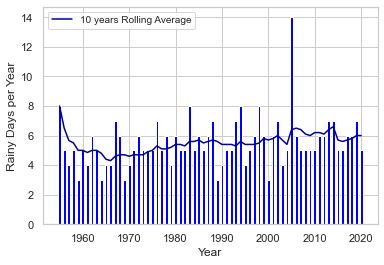

In [542]:
plt.bar(rainy_data.index,rainy_data['Rainy_Days'],width=0.6,color='blue')
plt.plot(rainy_data.index,rainy_data['Rolling_Average'],color='darkblue')
#plt.grid()

plt.xlabel('Year')
plt.ylabel("Rainy Days per Year")

plt.legend(labels =['10 years Rolling Average'], fontsize=10)
plt.show()

### Intepretation of the figure

The climate of Greece is Mediterranean on coasts and islands, with mild, rainy winters and hot, sunny summers. According to plot rainfall is a common phenomenon in Greece but the amount of raining has been decreased through years. We can observe that after 1985, the dry periods are longer than the dry periods before 1985. That fact is quite reasonable because as we saw in previous task, the Average Temperature has been increased since then, so the water evaporation is higher. Also, we can see that between 2007-2010 we had an enormous rainfall in our country,followed by many dry years. That is also a severe consequence of global warming. According to U.S. Environmental Protection Agency, as temperatures rise and the air becomes warmer, more moisture evaporates from land and water into the atmosphere. More moisture in the air generally means we can expect more rain and snow (called precipitation) and more heavy downpours.<br/>

Source: https://archive.epa.gov/climatechange/kids/impacts/signs/precip-patterns.html

## Conclusion...
In conclusion, we know that humans are responsible for the global warming. Human activities have increased the abundance of heat-trapping gases and the pollution in the atmosphere. Our world has been warmer  and warmer since the recent past years and if we do nothing, more frequent wildfires,longer periods of drought in some regions and an increase in the number, duration and intensity of tropical storms will be some of potential future effects. If we do not respect the planet we live,who can do it for us? Because we have to understand that we do not inherit the earth from our ancestors; we borrow it from our children.
Source: https://climate.nasa.gov/effects/